## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [177]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [178]:
# let's Exploe First Top Row Of Data
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [179]:
# Finding the Number Of Rows about Dataset
df.shape
RoWs_NuM = df.shape[0]
print(f"Number Of Rows Are : {RoWs_NuM}")

Number Of Rows Are : 294478


c. The number of unique users in the dataset.

In [180]:
# Finding The Number Of Unique Users
UniQue_UserS = df["user_id"].nunique()
print(f"Number Of Unique Users Are : {UniQue_UserS}")

Number Of Unique Users Are : 290584


d. The proportion of users converted.

In [181]:
# Finding Conversion Proportion
CoNveRt_ProP = df["converted"].mean()
print(f"Conversion Rate is : {CoNveRt_ProP}")

Conversion Rate is : 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [182]:
# Make a Condition Case To Set Accuracy
treat_Error = df.query('(group == "treatment" and landing_page == "old_page")')
control_Error = df.query('(group == "control" and landing_page == "new_page")')
TotAl = treat_Error + control_Error
TotAl.shape[0]

3893

f. Do any of the rows have missing values?

In [183]:
# Looking For Any Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [184]:
print("There are Not Missing Values")


There are Not Missing Values


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [185]:
# Remove Inaccurate Rows Where Groups and Landing Page Don't Match Then Store Accurate Result In New df2
df2 = df.query("(group == 'treatment' and landing_page == 'new_page')").append(df.query("(group == 'control' and landing_page == 'old_page')"))

In [186]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [187]:
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [188]:
# Looking For Duplicated User_id
deplicated_id = df2["user_id"].duplicated().sum()
print(f"There is One Duplicated Raw Which Is Total : {deplicated_id}")

There is One Duplicated Raw Which Is Total : 1


c. What is the row information for the repeat **user_id**? 

In [189]:
# Showing Infromation about duplicated raw
DupLicted_id = df2[df2["user_id"].duplicated()]
DupLicted_id

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [190]:
# Drop Duplicated User Id Then Keep Clean Data is Same df2
df2 = df2.drop_duplicates(["user_id"])

In [191]:
# checking for Removing Duplicated User Id
df2["user_id"].duplicated().sum()

0

In [192]:
# Knowing Conversion Rate Regardless Of Any Page    
df2["converted"].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [193]:
# Finding Conversion Rate Probability for individual is converted in Control Group
CoNTrol_ProP = df2.query("group == 'control'")["converted"].mean()
print(f"The probability of Control Group Converted Is : {CoNTrol_ProP}")

The probability of Control Group Converted Is : 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [194]:
# Finding Conversion Rate Probability for individual is converted In Treatment Group
TreatMnT_Prop =  df2.query("group == 'treatment'")["converted"].mean()
print(f"The probability of Control Group Converted Is : {TreatMnT_Prop}")

The probability of Control Group Converted Is : 0.11880806551510564


In [195]:
# Difference Between Conversion Rate
diff = CoNTrol_ProP -TreatMnT_Prop
diff

0.0015782389853555567

d. What is the probability that an individual received the new page?

In [196]:
# Finding Probability of Receiving New Page Comparison to Old Page
df2["landing_page"].value_counts()/len(df2)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

### Based On Our Result 

####  we notice that :

#### 1- The Conversion Rates Probability For The Number of Individuals in Control Group is (0.12%) Where The Conversion Rates For 

####    Treatment Group is (0.11%) so The Conversion Rates in Control Group Seems Larger Than The Conversion in Treatment Group.

#### 2- The Probability of Individuals to Convert to new page is (50%) compared to these ratio (49.99) for those who landing on old 

#### page where this difference is negligible.

#### So There is not Sufficient Evidence to help us Knowing that The New Page is Qualified to more Conversion So Practical we can't 

#### Make a Decision about New Page so we need to more Inference Make the Vision Clearer

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### We will Set The Null and Alternative Hypotheses as :
#### 1 - Null Hypothesis is :
###                                                        $$H_0: \mathbf{𝑝}_{new} - \mathbf{𝑝}_{old} \le 0$$ 
#### 2 - Alternative Hypothesis is :
###                                                          $$H_1: \mathbf{𝑝}_{new} - \mathbf{𝑝}_{old} > 0$$

### We Will do The Following :
#### 1- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 
#### 2- Use a sample size for each group equal to the ones in the `df2` data.
#### 3- Compute the difference in the "converted" probability for the two samples above. 
#### 4- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over  

#### 10,000 iterations; and calculate an estimate.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [197]:
# Conversion Rate For New Page
CR_p_new = df2["converted"].mean()
CR_p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [198]:
# Conversion Rate For Old Page
CR_p_old = df2["converted"].mean()
CR_p_old

0.11959708724499628

c. What is $n_{new}$?

In [199]:
# Number Of Individuals in Treatment Group
n_new = df2.query("group == 'treatment'")["user_id"].count()
n_new

145310

d. What is $n_{old}$?

In [200]:
# Number Of Individuals in Control Group
n_old = df2.query("group == 'control'")["user_id"].count()
n_old

145274

**--Simulate Sample for the `treatment` Group**<br> 
e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in 
**new_page_converted**.

In [201]:
# Simulate Sample for the Treatment Group
new_page_converted = np.random.choice([0,1], size = n_new, p = [(1-CR_p_new), CR_p_new])
new_page_converted.mean()

0.12061798912669465

**--Simulate Sample for the `control` Group** <br>
f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [202]:
# Simulate Sample for the Control Group
old_page_converted = np.random.choice([0,1], size = n_old, p = [(1-CR_p_old), CR_p_old])
old_page_converted.mean()

0.11889257540922671

**--Finding Differnces in The "Converted" Probability $p_{new}$ - $p_{old}$** for your simulated values from part (e) and (f).

In [203]:
p_differn = new_page_converted.mean() - old_page_converted.mean()
p_differn

0.0017254137174679413

**--Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 
 
h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a.
through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [204]:
p_diffs = []
size_1 = n_new
size_2 = n_old

for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size_1, p = [(1-CR_p_new), CR_p_new])
    old_page_converted = np.random.choice([0,1], size_2, p = [(1-CR_p_old), CR_p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)   

In [205]:
# Calculate The Actual Observed
new_mean = df2[df2["group"]== "treatment"]["converted"].mean()
old_mean = df2[df2["group"]== "control"]["converted"].mean()
obs_diffs = new_mean - old_mean
obs_diffs

-0.0015782389853555567

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

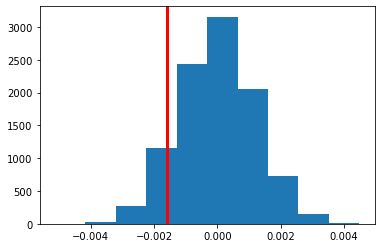

In [206]:
plt.hist(p_diffs);
plt.axvline(obs_diffs, c = "r", linewidth = 3 )

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [207]:
# Calaculate P-value
P_value = (p_diffs > obs_diffs).mean()
P_value

0.901

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### above in part (j) We calculate P-value which mean a measureing of the probability that an observed difference could 

#### have occurred just by random chance assuming that the null hypothesis is correct. The p-value is used as an alternative to 

#### rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. A smaller p-value 

#### means that there is stronger evidence in favor of the alternative hypothesis. and can determined as:

#### -The lower the p-value, the greater the statistical significance of the observed difference.
#### -P-value can be used as an alternative to or in addition to preselected confidence levels for hypothesis testing.

#### here The P-value is (90.5%) mean that proportion probability differences(p_diffs) is grater than observed differences (obs_diffs)

#### it is greater than our significance level (5%) which makes us conclude that our statistics probably come from the null and can 

#### lead to type 1 error so we fail to reject null hypotheses that mean the old page must be keep rather than the new and practically 

#### we don't have sufficient evidence that the new page do better than old page



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [208]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'")["converted"].sum()     # number of conversions with the old_page
convert_new = df2.query("group == 'treatment'")["converted"].sum()   # number of conversions with the new_page
n_old = df2.query("group == 'control'").shape[0]                     # number of individuals who were shown the old_page
n_new = df2.query("group == 'treatment'").shape[0]                   # number of individuals who received new_page

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [209]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = "smaller")
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### A Z-test is a statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a 

#### normal distribution. Z-tests test the mean of a distribution. For each significance level in the confidence interval, the Z-test has a 

#### single critical value  which makes decide whether or not reject null   

#### so here we calculate z-score as 1.31 since Our confidence level is 95% with alpha as 5% and when z-score less than 1.96 critical  

#### value mean that  the distribution of conversion mean located inside our confidence level and we calculated P-value in previous 

#### part founded it  as (90.5%) which above our significance level so we fail to reject the null and it indicates that probably the old 

#### page do better than the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since We Will Predict about outcomes For a Categorical Variable We Will Use a Logistic Regression.**
#### **We Will Do The Following:**

#### 1- create intercept = 1
#### 2- create a dummy variable 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [210]:
# Create a Intercept Column and dummy Variable Column 
df2["intercept"] = 1
df2["ab_page"] = pd.get_dummies(df2["group"])["treatment"]
df2.tail()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [211]:
log_mod = sm.Logit(df2["converted"], df2[["intercept", "ab_page"]])
result = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [212]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Feb 2022   Pseudo R-squ.:               8.077e-06
Time:                        21:57:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

####  Based on Model Result:

#### We Notice that the P-value associated with ab_page is (0.19) Which above Our Significance Level (.05%) and This Result is 

#### opposite to Our Value in Part II where Our Value was (90.5%) and this Difference Come from where here in our logistic model the  

#### null is correlation between two variables mean (two sides) but in part two the null was one side so ab_page factor not significant 

#### statistically And we can't reject the Null Hypothesis we can inference about more Factors to be The Vision clearly




f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### Adding Other Factor to Our Model can be making The Vision More Clearly and Improve Accuracy but If These Factor are 

#### correlated to Each Other Which Can Rise The Multicollinearity it can heart our Model These one of more disadvantages.

 



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [213]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [214]:
df_new["country"].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [215]:
### Create the necessary dummy variables
df_new[["UK", "US", "CA"]] = pd.get_dummies(df_new["country"])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [216]:
### Fit Your Linear Model And Obtain the Results
log_mod1 = sm.Logit(df_new["converted"], df_new[["intercept", "UK", "US"]])
result1 = log_mod1.fit() 
result1.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 19 Feb 2022   Pseudo R-squ.:               1.521e-05
Time:                        21:57:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK            -0.0408      0.027     -1.518      0.129      -0.093       0.012
US             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

#### The P-value associated with (UK) and (US) are (0.12, 0.456) Resbectivly so these Factor don't have Significant Influence On 

#### Conversion Rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

### Let's Expolre More Factors and Looking for Significant Effects on Conversion Rate.

In [217]:
df_new["USab_page"] = df_new["US"] * df_new["ab_page"]
df_new["UKab_page"] = df_new["UK"] * df_new["ab_page"]

In [218]:
log_mod2 = sm.Logit(df_new["converted"], df_new[["intercept", "UK", "US", "USab_page", "UKab_page"]])
result2 = log_mod2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Sat, 19 Feb 2022   Pseudo R-squ.:               2.417e-05
Time:                        21:57:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK            -0.0073      0.037     -0.196      0.844      -0.080       0.065
US             0.0045      0.018      0.257      0.797      -0.030       0.039
USab_page      0.0108      0.023      0.475      0.635      -0.034       0.056
UKab_page     -0.0674      0.052     -1.297      0.195      -0.169       0.034
==============================================================================
"""

#### Here We Notice from Multiple Regression Model That The P-value For the Intersection between Country&Page are greater than

#### Our Significance level (0.05%) so these Intersections don't have the Significance Effects so we cannot reject the Null 

#### Hypotheses.


<a id='conclusions'></a>
## Conclusions





#### Based on the data in the hand:

First in **probability** :

* we calculate The Probability of Individuals to Convert to new page and for those who landing on old page where the difference 
  is negligible 

*  and we found conversions rate for old page is greater than new page.

Secont in **Hypotheses Testing** :

* W e Fail To Reject The Null Hypothesis Where Our P-value Is Greater Than Our Significance Level 

Third in **Regression Model** :

* Our Factors don't support any significance level on Conversions rate

### So I don' suggest that the company implement theses new page.

<a id='Resources'></a>
## Resources

#### - statquest channel (youtube)
#### - 3blue 1brown channel  (youtube)
#### - Brandon Foltz  (youtube)
#### - khan academy  (youtube)